In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# %matplotlib inline
# Turn interactive plotting off
plt.ioff()

C:\Users\miche\AppData\Local\Temp\ipykernel_18992\536664923.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath, encoding = encoding, sep = '\t', skiprows = 4, header = None).dropna()


Text(0, 0.5, 'Amplitude [.]')

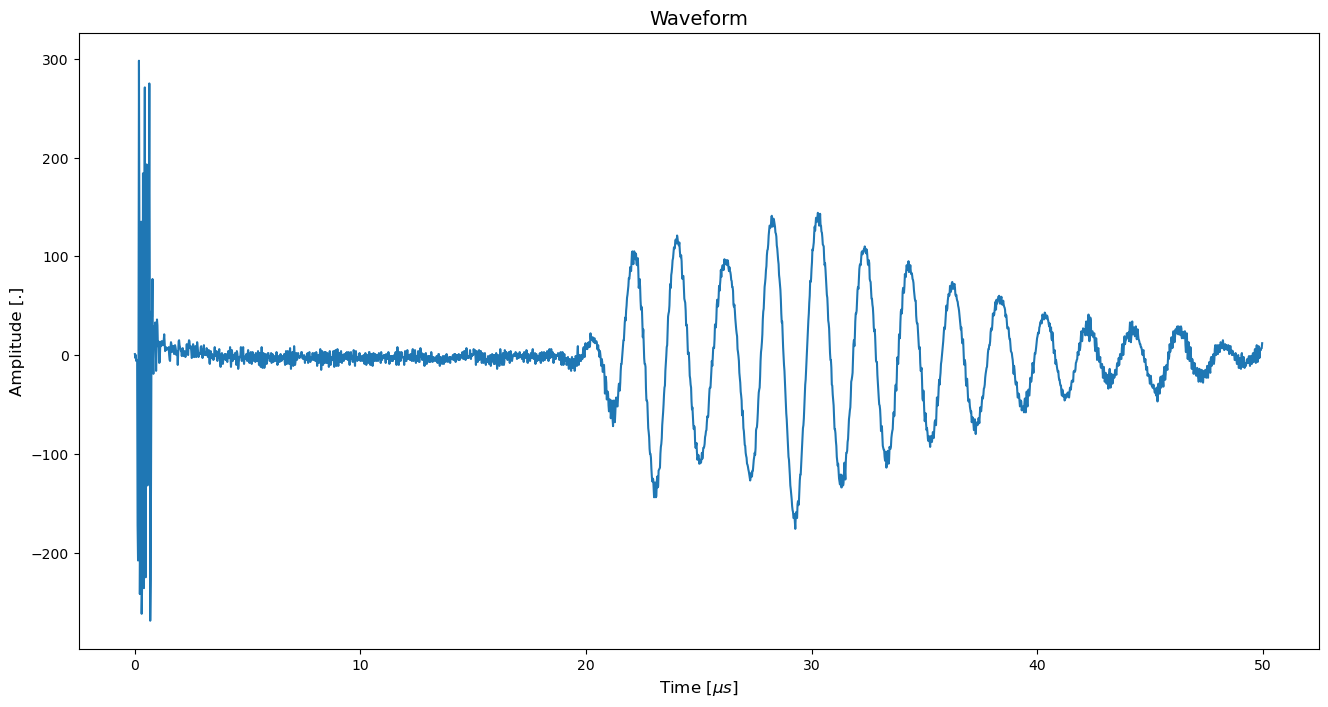

In [20]:
#file_name = '19_21_kn.bscan.tsv'
dir_path = 'D:\\1stexp_files'
out_path_dir = 'C:\\Users\\miche\\Documents\\Università\\PhD\\test_waveforms\\first_exp\\plots'
format = '.pdf'
row_to_plot = 5
remove_starting_noise = 150
highlight_start = 950
highlight_end = 1120
lim = 180

### METADATA ###
encoding = 'iso8859' #read greek letters             
sampling = 50  #sampling frequency in MHz
s_period = 1/sampling  
length = 50  #acquisition window in microseconds


### DEFINE TIME SCALE ###
time = np.arange(0,sampling,s_period)

for file_name in os.listdir(dir_path):
    
    ### IMPORT DATA ###
    file_path = os.path.join(dir_path, file_name)
    data = pd.read_csv(file_path, encoding = encoding, sep = '\t', skiprows = 4, header = None).dropna()
    
    # CHOOSE THE FILE PATH OF THE OUTPUT
    outfile_name_list = file_name.split('.')[0].split("_")
    outfile_name = "_".join(("waveform",outfile_name_list[0] ,outfile_name_list[2]))
    if int(outfile_name_list[0]) > int(outfile_name_list[1]):
        outfile_name = outfile_name + '_down'
    outfile_path = os.path.join(out_path_dir, outfile_name)

        ### PLOT DATA ###
    f = plt.figure(figsize = (13,4))
    plt.title(outfile_name, fontsize = 14) 
    plt.plot(time[remove_starting_noise:], data.iloc[row_to_plot][remove_starting_noise:], color = 'cornflowerblue')
    plt.plot(time[highlight_start:highlight_end], data.iloc[row_to_plot][highlight_start:highlight_end], color = 'red')
    plt.xlabel('Time [$\mu s$]', fontsize = 12)
    plt.ylabel('Amplitude [.]', fontsize = 12)
    plt.ylim(-lim,lim)
    plt.savefig(outfile_path + format, dpi = 300);
    plt.close()


################################################################
### THIS HAS TO BE ELIMINATED !!! ###

    if int(outfile_name_list[1]) == 27:
        outfile_name = "_".join(("waveform",outfile_name_list[1] ,outfile_name_list[2]))   #THIS TIME THE NAME MUST BE THE SECOND NUMBER
        outfile_path = os.path.join(out_path_dir, outfile_name)
        
        f = plt.figure(figsize = (13,4))
        plt.title(outfile_name, fontsize = 14) 
        plt.plot(time[remove_starting_noise:], data.iloc[15000][remove_starting_noise:], color = 'cornflowerblue')
        plt.plot(time[highlight_start:highlight_end], data.iloc[15000][highlight_start:highlight_end], color = 'red')  #PLOT THE 15K LINE
        plt.xlabel('Time [$\mu s$]', fontsize = 12)
        plt.ylabel('Amplitude [.]', fontsize = 12)
        plt.ylim(-lim,lim)
        plt.savefig(outfile_path + format, dpi = 300);
    
    if int(outfile_name_list[0]) > int(outfile_name_list[1]):
        if int(outfile_name_list[1]) == 21:
            outfile_name = "_".join(("waveform",outfile_name_list[1] ,outfile_name_list[2], 'down'))
            outfile_path = os.path.join(out_path_dir, outfile_name)

            f = plt.figure(figsize = (13,4))
            plt.title(outfile_name, fontsize = 14) 
            plt.plot(time[remove_starting_noise:], data.iloc[15000][remove_starting_noise:], color = 'cornflowerblue')
            plt.plot(time[highlight_start:highlight_end], data.iloc[15000][highlight_start:highlight_end], color = 'red')  #PLOT THE 15K LINE
            plt.xlabel('Time [$\mu s$]', fontsize = 12)
            plt.ylabel('Amplitude [.]', fontsize = 12)
            plt.ylim(-lim,lim)
            plt.savefig(outfile_path + format, dpi = 300);
            
        
    print(outfile_path)

        
        